# Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

# Importation

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Read data

In [80]:
data = pd.read_csv('User_Data.csv')

In [81]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# EDA

In [82]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.drop(columns =['User ID'],inplace =True)

In [84]:
data['Purchased'].unique()

array([0, 1], dtype=int64)

In [85]:
data['Purchased'].nunique()

2

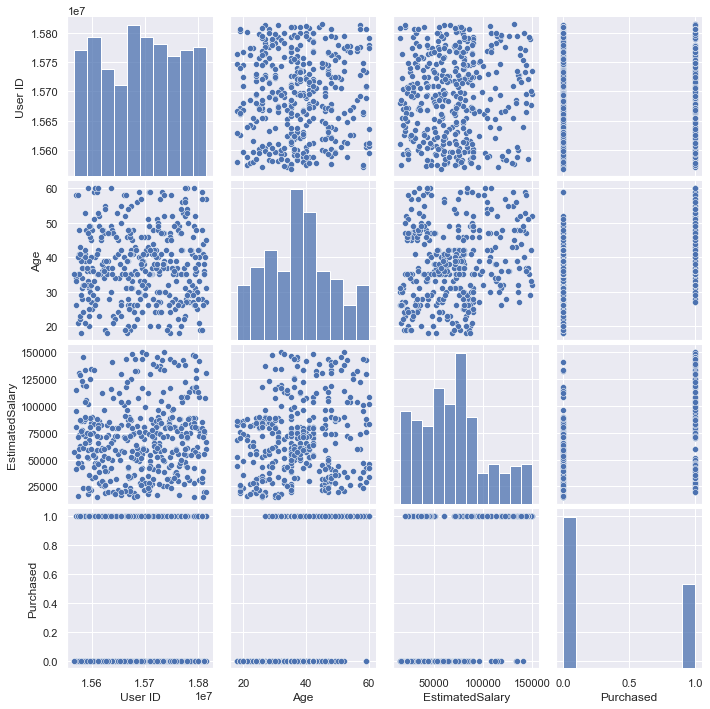

In [86]:
sns.pairplot(data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

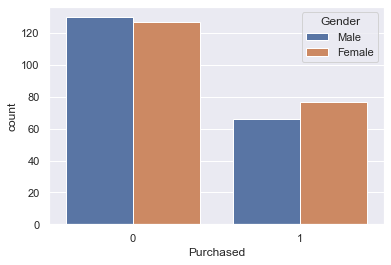

In [87]:
sns.set_theme(style="darkgrid")
sns.countplot(x =data['Purchased'] ,hue = data['Gender'])

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

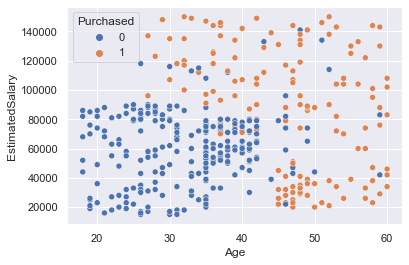

In [88]:
sns.scatterplot(x ='Age' , y ='EstimatedSalary' , data=data , hue = 'Purchased' )

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

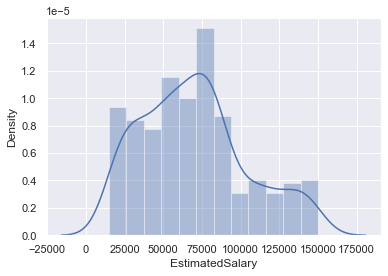

In [89]:
sns.distplot(data['EstimatedSalary'])

# Encoding

In [90]:
df = pd.get_dummies(data['Gender'])

In [91]:
data = pd.concat([df.iloc[:, [1]],data] ,axis =1)

In [92]:
data.drop(columns =['Gender'],inplace =True)

In [94]:
data.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


# Spliting data

In [95]:
# input
x = data.iloc[:, :-1].values
  
# output
y = data.iloc[:, -1].values

In [96]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain) 
xtest = sc.transform(xtest)
  
print (xtrain[0:10, :])

[[-0.98019606  0.58164944 -0.88670699]
 [ 1.02020406 -0.60673761  1.46173768]
 [-0.98019606 -0.01254409 -0.5677824 ]
 [-0.98019606 -0.60673761  1.89663484]
 [-0.98019606  1.37390747 -1.40858358]
 [-0.98019606  1.47293972  0.99784738]
 [ 1.02020406  0.08648817 -0.79972756]
 [ 1.02020406 -0.01254409 -0.24885782]
 [-0.98019606 -0.21060859 -0.5677824 ]
 [-0.98019606 -0.21060859 -0.19087153]]


# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [99]:
y_pred = classifier.predict(xtest)

In [100]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), ytest.reshape(len(ytest),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


# Evaluation of Model 

In [101]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(ytest, y_pred)
  
print("Confusion Matrix : \n", cm)
print(classification_report(ytest, y_pred))

Confusion Matrix : 
 [[65  3]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [102]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9


# Prediction for a Single person

In [138]:
Male ,Age ,EstimatedSalary = map(int, input().strip().split())
if (Male == 1) :
    print(f'A man with age = {Age} and Salary = {EstimatedSalary} ')
else :
    print(f'A Woman with age = {Age} and Salary = {EstimatedSalary} ')
          
prediction  = int(classifier.predict(sc.transform([[Male,Age,EstimatedSalary ]])))

if prediction == 1  :
    print("User will Purchase the pack !!!! ")
else :
    print("XXX User is expected to skip our pack !!! XXX")

1 21 45423
A man with age = 21 and Salary = 45423 
XXX User is expected to skip our pack !!! XXX
